The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



**Problem statement: Predicting turbine energy yield (TEY) using ambient variables as features.**



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
data=pd.read_csv("gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


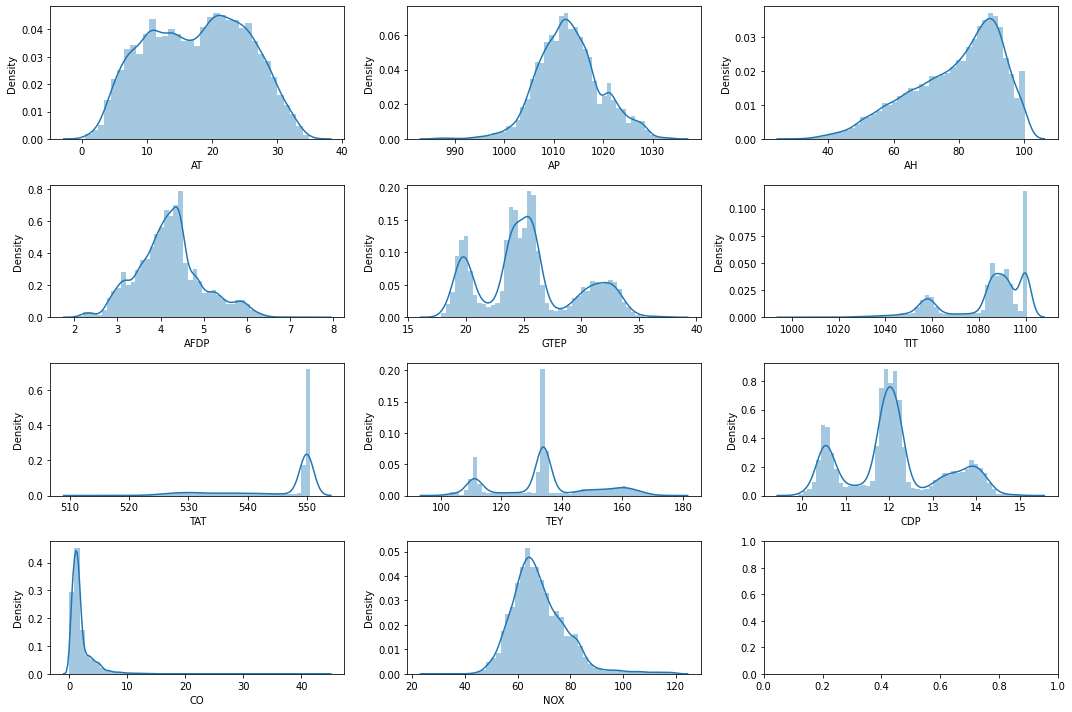

In [8]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.distplot(data.AT,ax=ax[0,0])
sns.distplot(data.AP,ax=ax[0,1])
sns.distplot(data.AH,ax=ax[0,2])
sns.distplot(data.AFDP,ax=ax[1,0])
sns.distplot(data.GTEP,ax=ax[1,1])
sns.distplot(data.TIT,ax=ax[1,2])
sns.distplot(data.TAT,ax=ax[2,0])
sns.distplot(data.TEY,ax=ax[2,1])
sns.distplot(data.CDP,ax=ax[2,2])
sns.distplot(data.CO,ax=ax[3,0])
sns.distplot(data.NOX,ax=ax[3,1])
plt.tight_layout()
plt.show()

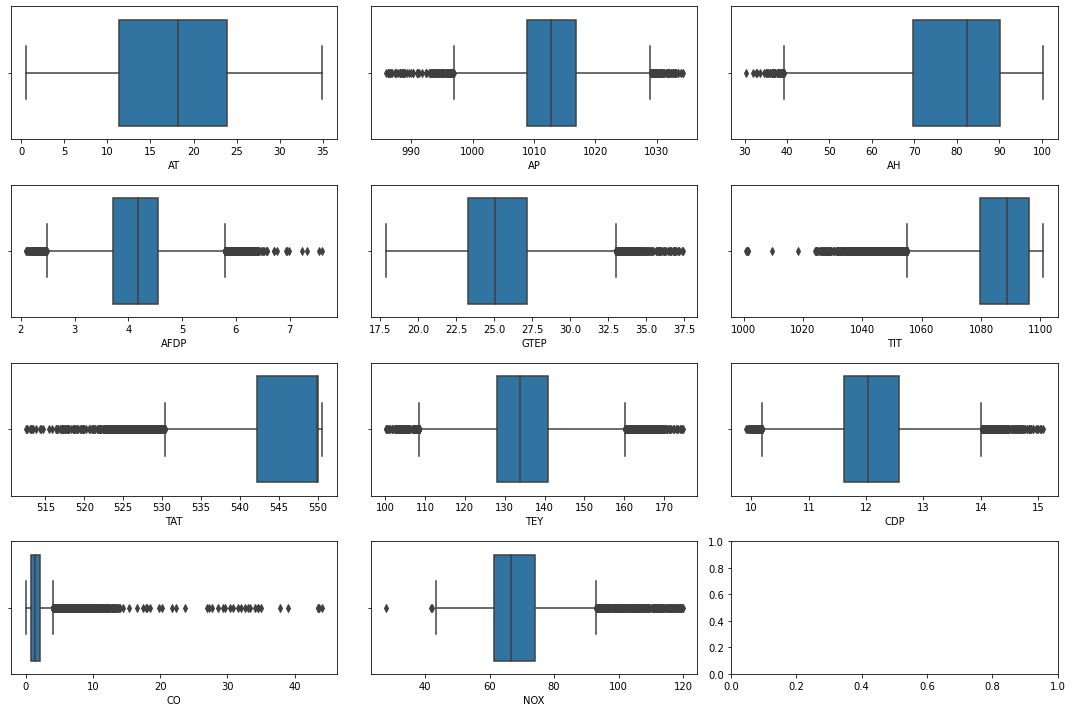

In [9]:
fig,ax=plt.subplots(4,3,figsize=(15,10))
sns.boxplot(data.AT,ax=ax[0,0])
sns.boxplot(data.AP,ax=ax[0,1])
sns.boxplot(data.AH,ax=ax[0,2])
sns.boxplot(data.AFDP,ax=ax[1,0])
sns.boxplot(data.GTEP,ax=ax[1,1])
sns.boxplot(data.TIT,ax=ax[1,2])
sns.boxplot(data.TAT,ax=ax[2,0])
sns.boxplot(data.TEY,ax=ax[2,1])
sns.boxplot(data.CDP,ax=ax[2,2])
sns.boxplot(data.CO,ax=ax[3,0])
sns.boxplot(data.NOX,ax=ax[3,1])
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
data1=pd.DataFrame(trans.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


Extracting Dependant & Independant variables

In [11]:
X=data1.drop(axis=0,columns="TEY").values
Y=data1["TEY"].values

In [12]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [13]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [14]:
seed=7
np.random.seed(seed)

In [15]:
model=Sequential()
model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [16]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 5s 4ms/step - loss: 0.0109 - accuracy: 9.9246e-05 - val_loss: 0.0011 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 5.5665e-04 - accuracy: 9.9246e-05 - val_loss: 3.7306e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 3.0841e-04 - accuracy: 9.9246e-05 - val_loss: 2.7098e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 3s 3ms/step - loss: 2.5352e-04 - accuracy: 9.9246e-05 - val_loss: 2.5350e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 2.3034e-04 - accuracy: 9.9246e-05 - val_loss: 2.0763e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 2.1372e-04 - accuracy: 9.9246e-05 - val_loss: 2.1013e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===================

In [18]:
scores=model.evaluate(X,Y)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 1.5258e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [19]:
history=model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.7288e-04 - accuracy: 9.9246e-05 - val_loss: 1.5693e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.7274e-04 - accuracy: 9.9246e-05 - val_loss: 1.5403e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.7093e-04 - accuracy: 9.9246e-05 - val_loss: 1.2678e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.7202e-04 - accuracy: 9.9246e-05 - val_loss: 1.9896e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.7271e-04 - accuracy: 9.9246e-05 - val_loss: 1.3707e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.7617e-04 - accuracy: 9.9246e-05 - val_loss: 1.6076e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

In [20]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

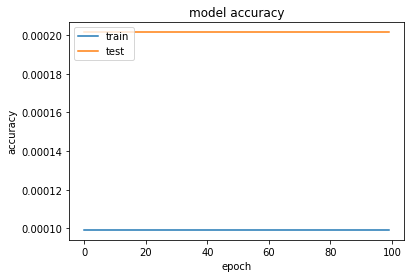

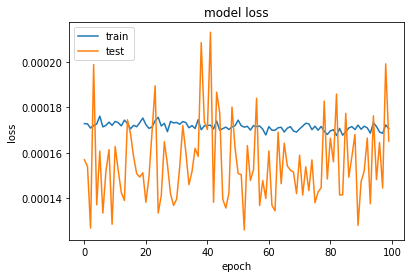

In [22]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

**Hyperparameter Tuning - Batch Size & Epochs**

In [23]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [24]:
def create_model():
    model = Sequential()
    model.add(Dense(12,input_dim=10,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse',optimizer=adam,metrics=['accuracy'])
    return model

In [26]:
#Creating Model
model=KerasClassifier(build_fn=create_model,verbose=0)
#Define grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]
#Make a dictionary of grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,